In [ ]:
import requests
from bs4 import BeautifulSoup

# Récupérer le contenu de la page web
# Initialiser avec l'URL de la page que nous voulons extraire
url = "https://www.carrefour.fr/r/bio-et-ecologie/bio-petit-prix"
# Utiliser la méthode GET pour envoyer une requête à l'URL spécifiée
response = requests.get(url)
# Récupérer le contenu HTML de la page web que nous voulons extraire
content = response.content

# La bibliothèque BeautifulSoup permet de parser et de naviguer dans un document HTML (ou XML) et d'extraire les informations souhaitées
# Analyser le contenu de la page web avec Beautiful Soup
soup = BeautifulSoup(content, 'html.parser')

# Le script cherche les éléments HTML qui contiennent les données que nous souhaitons extraire
# Trouver les éléments HTML qui contiennent les données que vous souhaitez extraire
data = []
for product in soup.find_all('div', {'class': 'product-tile'}):
    name = product.find('div', {'class': 'product-tile__name'}).text.strip()
    price = product.find('div', {'class': 'product-tile__price'}).text.strip()
    data.append([name, price])

In [ ]:
import sqlite3

# Connexion à la base de données SQLite
conn = sqlite3.connect('ma_base_de_donnees.db')

# Création d'une table pour stocker les données
conn.execute('''
CREATE TABLE IF NOT EXISTS produits (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nom TEXT,
    prix TEXT
);
''')

# Insertion des données dans la table
data = [ ['Produit 1', '10.99'], ['Produit 2', '12.99'], ['Produit 3', '8.99'] ]
for item in data:
    conn.execute('INSERT INTO produits (nom, prix) VALUES (?, ?)', item)

# Commit des changements
conn.commit()

# Fermeture de la connexion
conn.close()

2023-03-25 22:41:54.676 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-03-25 22:41:54.679 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-03-25 22:41:55.218 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


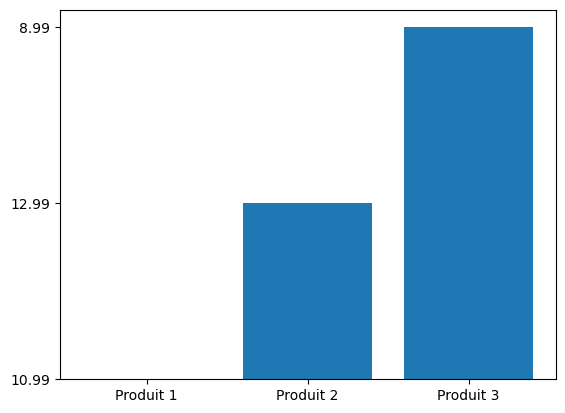

In [ ]:
import sqlite3
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à la base de données SQLite
conn = sqlite3.connect('ma_base_de_donnees.db')

# Récupération des données de la base de données dans un dataframe pandas
df = pd.read_sql_query('SELECT * FROM produits', conn)

# Affichage des données sous forme de graphique avec matplotlib
fig, ax = plt.subplots()
ax.bar(df['nom'], df['prix'])
st.pyplot(fig)

# Affichage des données sous forme de tableau avec Streamlit
st.write(df)

# Fermeture de la connexion
conn.close()
